In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(r"C:\Users\manoj\Downloads\sssss.csv")
X = data[["Feature1", "Feature2"]].values
y = data["Label"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def rbf(x, c, s):
    return tf.exp(-tf.reduce_sum((x - c) ** 2, axis=1) / (2 * s ** 2))


n_centers = 10  # Number of RBF centers
sigma = 1.0     # Spread parameter


random_idx = np.random.choice(X_train.shape[0], n_centers, replace=False)
centers = tf.constant(X_train[random_idx], dtype=tf.float32)


inputs = tf.keras.layers.Input(shape=(X_train.shape[1],))
outputs = []


for c in centers:
    outputs.append(rbf(inputs, c, sigma))


rbf_layer = tf.stack(outputs, axis=1)


fc_layer = tf.keras.layers.Dense(1, activation='sigmoid')(rbf_layer)
model = tf.keras.Model(inputs=inputs, outputs=fc_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")


Epoch 1/50
50/50 [==============================] - 1s 1ms/step - loss: 0.5844 - accuracy: 0.6450
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.8800
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 0.4991 - accuracy: 0.9588
Epoch 4/50
50/50 [==============================] - 0s 1ms/step - loss: 0.4630 - accuracy: 0.9625
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.9688
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.9712
Epoch 7/50
50/50 [==============================] - 0s 1ms/step - loss: 0.3753 - accuracy: 0.9712
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.3517 - accuracy: 0.9712
Epoch 9/50
50/50 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.9700
Epoch 10/50
50/50 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.9712
Epoch 11/50
50/50 [

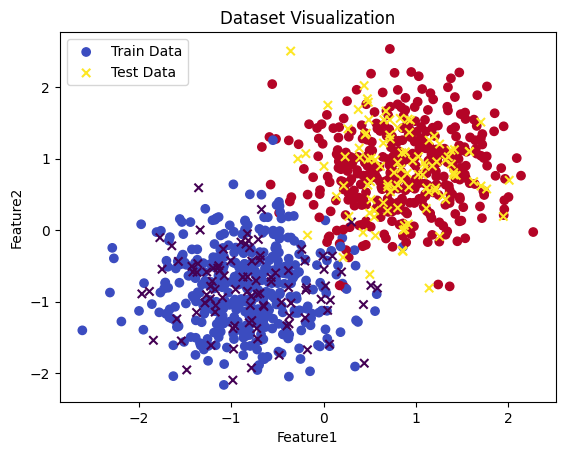

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.flatten(), cmap="coolwarm", label="Train Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.flatten(), cmap="viridis", label="Test Data", marker='x')
plt.title("Dataset Visualization")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend() 
plt.show()
